In [44]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import scipy

In [45]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed culture/STEDBIN/Allchannels_for_autofluorescence_correction/20190529_homer_star635pnb_dmso/TIF_imp/' #master folder
protein="TNR" #TNR,Agg,WFA,HABP

In [46]:
results = {"filename":[],
          "greenchannelno":[],
          "ecmchannelno":[],
          "funcatchannelno":[]
          }
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    #if "STED" in str(filelist[i]):
        #if "_analyse519" in str(filelist[i]):
            if ("Focus" in str(filelist[i]))==False:
                if ("save" in str(filelist[i]))==False:
                   # if (protein in str(filelist[i]))==True:
                        if filelist[i].endswith(".tif"): 
                            if str(filelist[i][:-12]) not in str(results["filename"]):

                                results["filename"].append(filelist[i][:-12])
                                #results["exp condition"].append(filelist[i][:-12].split('/')[-2])
                                #channeldir="/".join(filelist[i][:-12].split("/")[:-2])
                                #exec(open(channeldir+"/channels.txt").read())
                                results["ecmchannelno"].append(2)
                                results["funcatchannelno"].append(1)
                                results["greenchannelno"].append(3)


## Loading a random image

Image name: 9_ExpControl


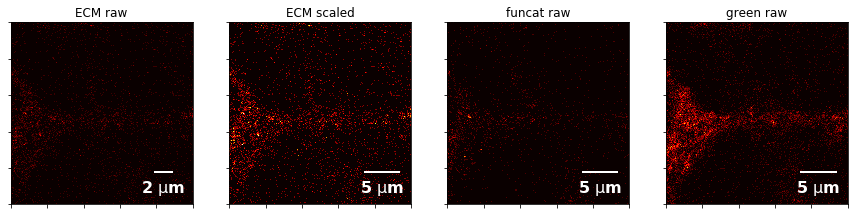

In [47]:
randomno=np.random.randint(1,len(results["filename"]))
ecm_channel_no=2
funcat_channel_no=1
green_channel_no=3

funcat_image_name=results["filename"][randomno]+" Ch"+str(funcat_channel_no)+" {0}.tif"
ecm_image_name=results["filename"][randomno]+" Ch"+str(ecm_channel_no)+" {0}.tif"
green_image_name=results["filename"][randomno]+" Ch"+str(green_channel_no)+" {0}.tif"




print("Image name:",results["filename"][randomno].split('/')[-1])
#print("Experimental condition:",results["exp condition"][randomno])
ecm_image=pims.open(ecm_image_name)[0]
funcat_image=pims.open(funcat_image_name)[0]
green_image=pims.open(green_image_name)[0]
   
figure=plt.figure(figsize=(15,15))
figure.add_subplot(141)
plt.imshow(ecm_image,interpolation='none',cmap='hot')
plt.title('ECM raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
figure.add_subplot(142)
plt.imshow(ecm_image,interpolation='none',cmap='hot',vmin=3*np.min(ecm_image),vmax=0.4*np.max(ecm_image))
plt.title('ECM scaled')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(25, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(143)
plt.imshow(funcat_image,interpolation='none',cmap='hot')
plt.title('funcat raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(25, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(144)
plt.imshow(green_image,interpolation='none',cmap='hot')
plt.title('green raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(25, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

In [48]:
#correlation between green and orange channels
ratio=np.divide(ecm_image,green_image)
ratio[np.isnan(ratio)] = 0
ratio[np.isinf(ratio)] = 0

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


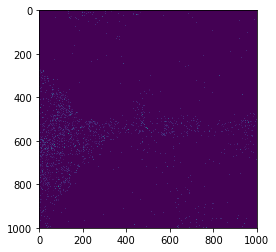

In [49]:
plt.imshow(ratio)

In [51]:
ratio.mean()

0.030499199747474753

In [ ]:
plt.im

In [64]:
ratios=[]
ecm_channel_no=2
funcat_channel_no=1
green_channel_no=3
###for all images
for image in range(0,len(results["filename"])):
        

    funcat_image_name=results["filename"][image]+" Ch"+str(funcat_channel_no)+" {0}.tif"
    ecm_image_name=results["filename"][image]+" Ch"+str(ecm_channel_no)+" {0}.tif"
    green_image_name=results["filename"][image]+" Ch"+str(green_channel_no)+" {0}.tif"

    print("Image name:",results["filename"][image].split('/')[-1])
    #print("Experimental condition:",results["exp condition"][randomno])
    ecm_image=pims.open(ecm_image_name)[0]
    funcat_image=pims.open(funcat_image_name)[0]
    green_image=pims.open(green_image_name)[0]
    
    #bandpass
    lowpass = ndi.gaussian_filter(ecm_image, 2)
    ecm_image = ecm_image - lowpass
    lowpass = ndi.gaussian_filter(funcat_image, 2)
    funcat_image = funcat_image - lowpass
    lowpass = ndi.gaussian_filter(green_image, 2)
    green_image = green_image - lowpass
    
    #binarize to find spots
    ecm_image[ecm_image<1]=0
    ecm_image[ecm_image>1]=1
    funcat_image[funcat_image<1]=0
    funcat_image[funcat_image>1]=1
    green_image[green_image<1]=0
    green_image[green_image>1]=1
    
    ratio=np.divide(ecm_image,green_image)
    ratio[np.isnan(ratio)] = 0
    ratio[np.isinf(ratio)] = 0
    ratios.append(ratio.mean())

Image name: 1_ExpControl


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


Image name: 2_ExpControl
Image name: 3_ExpControl
Image name: 4_ExpControl
Image name: 5_ExpControl
Image name: 6_ExpControl
Image name: 7_ExpControl
Image name: 8_ExpControl
Image name: 9_ExpControl
Image name: 10_ExpControl


In [63]:
np.mean(ratios)

0.0932105

## Plots

In [8]:
df_ecm=pd.DataFrame(ecm_spots_results)
df_funcat=pd.DataFrame(funcat_spots_results)

### Backup

In [9]:
#os.mkdir(expdir+'results/')
df_ecm.to_csv(path_or_buf=expdir+'results/results_'+str(protein)+'_ecm.csv')
df_funcat.to_csv(path_or_buf=expdir+'results/results_'+str(protein)+'_funcat.csv')
#df_synapses.to_csv(path_or_buf=expdir+'results/results_'+str(protein)+'_synapses.csv')

In [ ]:
df_ecm=pd.read_csv(expdir+'results/results_'+str(protein)+'.csv')

In [ ]:
df_ecm['Protein']='None'
df_ecm.loc[df_ecm['filename'].str.contains('funcat'), 'Protein'] = 'AHA'
df_ecm.loc[df_ecm['filename'].str.contains('_blocked'), 'Protein'] = 'AHA'
df_ecm.loc[df_ecm['filename'].str.contains('unblocked'), 'Protein'] = 'Unblocked Control'
df_ecm.loc[df_ecm['filename'].str.contains('ctrl_acth'), 'Protein'] = 'Neg Control VAChT'
df_ecm.loc[df_ecm['filename'].str.contains('ctrl_secondarymouse635'), 'Protein'] = 'Pos Control Secondary nb'
df_funcat['Protein']='None'
df_funcat.loc[df_funcat['filename'].str.contains('funcat'), 'Protein'] = 'AHA'
df_funcat.loc[df_funcat['filename'].str.contains('_blocked'), 'Protein'] = 'AHA'
df_funcat.loc[df_funcat['filename'].str.contains('unblocked'), 'Protein'] = 'Unblocked Control'
df_funcat.loc[df_funcat['filename'].str.contains('ctrl_acth'), 'Protein'] = 'Neg Control VAChT'
df_funcat.loc[df_funcat['filename'].str.contains('ctrl_secondarymouse635'), 'Protein'] = 'Pos Control Secondary nb'
df_ecm['Distance to funcat']='>50nm'
df_ecm.loc[df_ecm["distance to nearest funcat centroid [nms]"]<50,'Distance to funcat']='<50nm'
df_funcat['Distance to ecm']='>50nm'
df_funcat.loc[df_funcat["distance to nearest ecm centroid [nms]"]<50,'Distance to ecm']='<50nm'

### Graph for distances from ECM spots to FUNCAT

AHA
Neg Control VAChT
Pos Control Secondary nb


Text(0.5, 0, 'Distance (nms)')

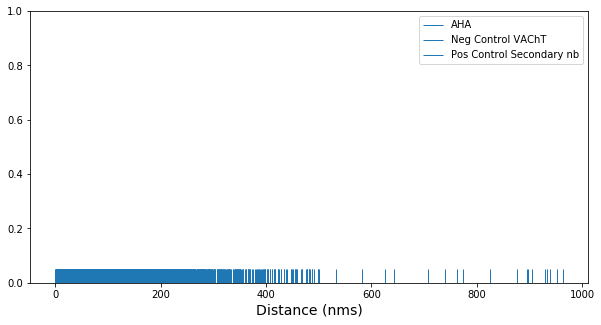

In [29]:
fig=plt.figure(figsize=(10,5))
for prot in df_ecm["Protein"].unique():
    print(prot)
    g=sns.rugplot(df_ecm[df_ecm["Protein"]==prot]["distance to nearest funcat centroid"],
               label=prot
              )
#g=sns.kdeplot(df_funcat["distance to nearest ecm centroid [nms]"],shade=True)
#g=sns.distplot(df_ecm["distance to nearest synapse centroid [nms]"],label="Distance to nearest synapse")
    #g.set_xticks(np.linspace(0,100,11))
    #g.set_xlim([-200,2000])
    plt.legend()

g.set_xlabel('Distance (nms)',fontsize=14)


### Graph for distances from FUNCAT spots to ECM

AHA
Neg Control VAChT
Pos Control Secondary nb


Text(0.5, 0, 'Distance (nms)')

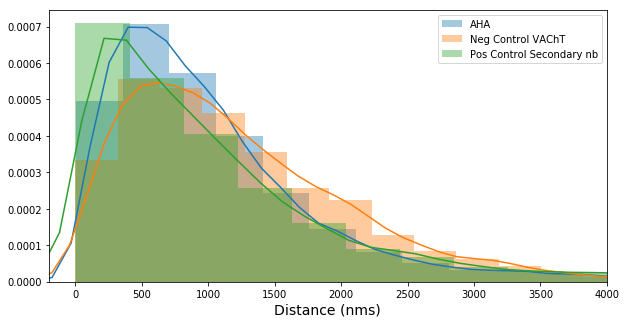

In [25]:
fig=plt.figure(figsize=(10,5))
for prot in df_funcat["Protein"].unique():
    print(prot)
    g=sns.distplot(df_funcat[df_funcat["Protein"]==prot]["distance to nearest ecm centroid [nms]"],
               label=prot
              )
#g=sns.kdeplot(df_funcat["distance to nearest ecm centroid [nms]"],shade=True)
#g=sns.distplot(df_ecm["distance to nearest synapse centroid [nms]"],label="Distance to nearest synapse")
    #g.set_xticks(np.linspace(0,100,11))
    g.set_xlim([-200,4000])
    plt.legend()

g.set_xlabel('Distance (nms)',fontsize=14)



### Picture to explain

Image name: /Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190522_funcatdbco_TNR_analyse519/STED/ctrl_secondarymouse635/TIF_imp/tnr580_01_ExpControl
Experimental condition: TIF_imp


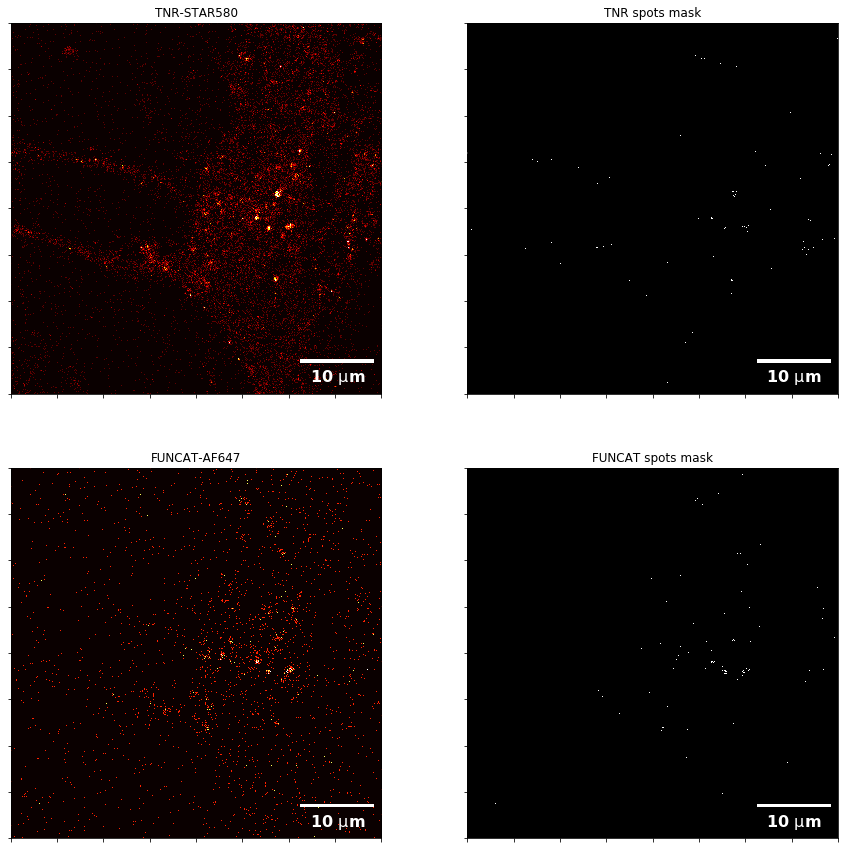

In [23]:
randomno=np.random.randint(1,len(results["filename"]))
ecm_channel_no=2
funcat_channel_no=1


ecm_image_name=results["filename"][randomno]+" Ch"+str(ecm_channel_no)+" {0}.tif"
funcat_image_name=results["filename"][randomno]+" Ch"+str(funcat_channel_no)+" {0}.tif"


print("Image name:",results["filename"][randomno])
print("Experimental condition:",results["exp condition"][randomno])
ecm_image=pims.open(ecm_image_name)[0]
funcat_image=pims.open(funcat_image_name)[0]
ecm_mask=results["TNR spots mask"][randomno]
funcat_mask=results["funcat spots mask"][randomno]
    
figure=plt.figure(figsize=(15,15))

figure.add_subplot(221)
plt.imshow(ecm_image,interpolation='none',cmap='hot',vmin=3*np.min(ecm_image),vmax=0.4*np.max(ecm_image))
plt.title('TNR-STAR580')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(25, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter    
plt.gca().add_artist(scalebar)


figure.add_subplot(222)
plt.imshow(ecm_mask,interpolation='none',cmap='hot')
plt.title('TNR spots mask')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(25, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)


figure.add_subplot(223)
plt.imshow(funcat_image,interpolation='none',cmap='hot',vmin=3*np.min(ecm_image),vmax=0.4*np.max(funcat_image))
plt.title('FUNCAT-AF647')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(25, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(224)
plt.imshow(funcat_mask,interpolation='none',cmap='hot')
plt.title('FUNCAT spots mask')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(25, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)

AHA
Neg Control VAChT
Pos Control Secondary nb


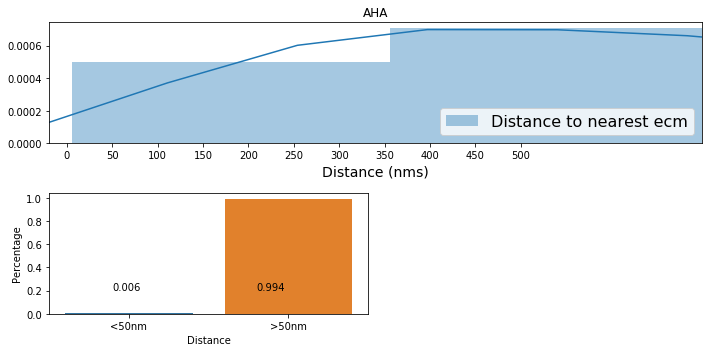

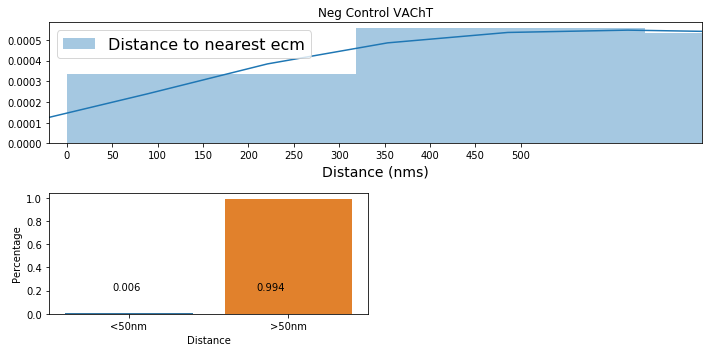

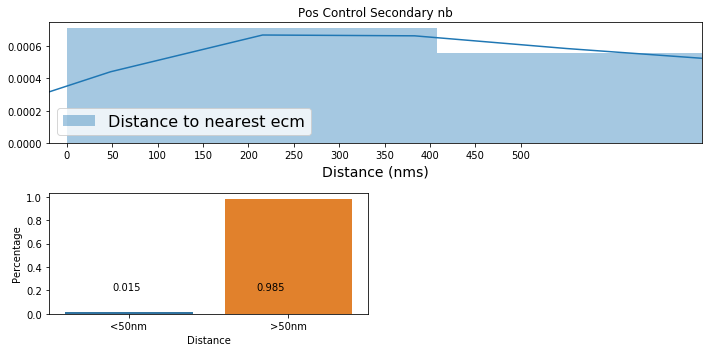

In [24]:
for protein in df_funcat["Protein"].unique():
    print(protein)
    df2plot=df_funcat[df_funcat["Protein"]==protein]
    #df2plot=df_funcat[(df_funcat["Protein"]==protein)]
    fig=plt.figure(figsize=(10,5))
    fig.add_subplot(211)
    g=sns.distplot(df2plot["distance to nearest ecm centroid [nms]"],label="Distance to nearest ecm")
    g.set_xticks(np.linspace(0,500,11))
    g.set_xlim([-20,700])
    plt.legend(fontsize=16)
    g.set_xlabel('Distance (nms)',fontsize=14)
    plt.title(protein)
    
    fig.add_subplot(223)
    dfcount=df2plot.groupby("Distance to ecm").count()
    smallerthan=dfcount["filename"].unique()[0]
    biggerthan=dfcount["filename"].unique()[1]
    propsmaller=smallerthan/(smallerthan+biggerthan)
    propbigger=biggerthan/(smallerthan+biggerthan)
    dfprops={'Distance':['<50nm','>50nm'],'Percentage':[propsmaller,propbigger]}
    dfprops=pd.DataFrame(dfprops)
    sns.barplot(x="Distance",y="Percentage",data=dfprops)
    plt.text(x=-0.1,y=0.2,s=np.round(propsmaller,3))
    plt.text(x=0.8,y=0.2,s=np.round(propbigger,3))
    
    fig.tight_layout()

In [ ]:
fig=plt.figure(figsize=(10,5))
for prot in df_ecm["Protein"].unique():
    print(prot)
    